In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [82]:
df = pd.read_csv('../data/processed/encoded_data.csv')

In [83]:
df.isFraud.value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

In [84]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
2,2806.00,2806.00,0.00,0.00,0.00,1,0,0,0,0,1
3,2806.00,2806.00,0.00,26202.00,0.00,1,0,1,0,0,0
4,20128.00,20128.00,0.00,0.00,0.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16421,265820.49,0.00,0.00,899770.81,1165591.30,0,0,1,0,0,0
16422,186719.44,159.00,186878.44,0.00,0.00,0,1,0,0,0,0
16423,136972.48,0.00,0.00,1140442.13,1277414.61,0,0,1,0,0,0
16424,9935.66,286287.65,276351.98,0.00,0.00,0,0,0,0,1,0


In [85]:
# the input features
X = df.drop(columns=['isFraud'], axis=1)
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
2,2806.00,2806.00,0.00,0.00,0.00,0,0,0,0,1
3,2806.00,2806.00,0.00,26202.00,0.00,0,1,0,0,0
4,20128.00,20128.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
16421,265820.49,0.00,0.00,899770.81,1165591.30,0,1,0,0,0
16422,186719.44,159.00,186878.44,0.00,0.00,1,0,0,0,0
16423,136972.48,0.00,0.00,1140442.13,1277414.61,0,1,0,0,0
16424,9935.66,286287.65,276351.98,0.00,0.00,0,0,0,1,0


In [86]:
# the target feature detecting if it is fraud
y = df['isFraud']
y

0        1
1        1
2        1
3        1
4        1
        ..
16421    0
16422    0
16423    0
16424    0
16425    0
Name: isFraud, Length: 16426, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Creation


### Random Forest Classification Model

In [88]:
# Random Forest Model
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=0)

In [89]:
rf_clf.score(X_test, y_test)

0.9455819959417082

### Gradient Boosting Classification Model

In [90]:
# Gradient Boosting Classification Model

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [91]:
gb_clf.score(X_test, y_test)

0.9843202361187973

The score for the gradient boosting classifier is higher by 4% than the random forest without any hyperparameter optimizations.

# Hyperparameter Search

In [121]:
def heatmap_confusion_matrix(conf_matrix):
    """ display the confusion matrix as a 2D heatmap 
        part of this code taken from: https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/"""
    plt.figure(figsize=(4,4))
    sns.set_theme(font_scale = 1.5)
    
    ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # show numbers in the cells
        fmt='d', # show numbers as integers
        cbar=False, # don't show the color bar
        cmap='flag', # customize color map
        vmax=175 # to get better color contrast
    )
    
    ax.set_xlabel("Predicted", labelpad=20)
    ax.set_ylabel("Actual", labelpad=20)
    plt.show()

In [127]:
def display_roc_curve(clf, X_train, y_train, X_test, y_test):
    y_score = clf.predict_proba(X_test)

    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)

    class_of_interest = "1"
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]


    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"Fraud vs NonFraud",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves:\nFraud vs NonFraud",
    )

In [92]:
# optimizing random forest model
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

clf = RandomForestClassifier()

rf_clf = GridSearchCV(clf, parameters)
rf_clf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 6, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [95]:
rf_clf.score(X_test, y_test)

0.9935436266371518

In [97]:
rf_clf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:
# find f1 score

y_pred = rf_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.993607305936073

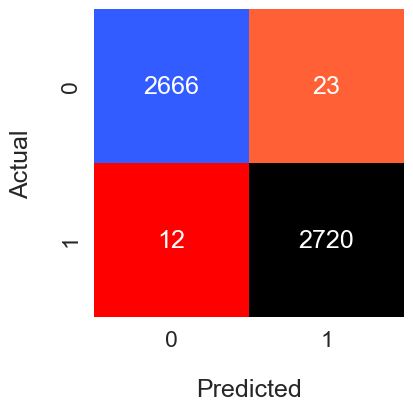

In [120]:
cf = confusion_matrix(y_test, y_pred)
heatmap_confusion_matrix(cf)

In [98]:
# optimizing gradient boosting model

parameters = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

clf = GradientBoostingClassifier()

gb_clf = GridSearchCV(clf, parameters)
gb_clf.fit(X_train, y_train)



GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 4],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]})

In [100]:
gb_clf.score(X_test, y_test)

0.9891163991883416

In [101]:
gb_clf.best_params_

{'learning_rate': 1,
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [117]:
# find f1 score

y_pred = gb_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.9892316116079576

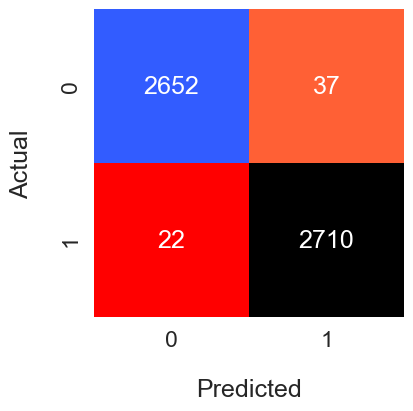

In [118]:
cf = confusion_matrix(y_test, y_pred)
heatmap_confusion_matrix(cf)

# Model Evaluation

After optimizing parameters both models are around .98 f1 score with gradient descent pulling slightly ahead. However this is misleading as when we look at the confusion matrix we can see that the gradient descent model misidentifies more than the random forest classification model. 